In [1]:
import pandas as pd
from pandas import read_csv
import glob
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load all the blocks and concatenate them into one database
path = '/Users/mariabelenalberti/Documents/smart-meters-in-london/halfhourly_dataset' # use your path
all_files = glob.glob(path + "/*.csv")

lista = []
i = 0
for filename in all_files:
    i = i + 1
    print(i) # should go up to 112
    df = pd.read_csv(filename, index_col=None, header=0)
    lista.append(df)

halfhourly_consumption = pd.concat(lista, axis=0, ignore_index=True)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25


/Users/mariabelenalberti/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112


In [5]:
halfhourly_consumption.rename(columns={"energy(kWh/hh)": "energy"})
halfhourly_consumption['tstp']= pd.to_datetime(halfhourly_consumption['tstp'],format = '%Y-%m-%d')
halfhourly_consumption['year'] = pd.DatetimeIndex(halfhourly_consumption['tstp']).year

In [7]:
nulls = halfhourly_consumption[halfhourly_consumption['energy(kWh/hh)'] == "Null"]

In [9]:
nulls.head()

,LCLid,tstp,energy(kWh/hh),year
18104,MAC000027,2012-12-18 15:13:41,Null,2012
52061,MAC000406,2012-12-18 15:15:33,Null,2012
85926,MAC000492,2012-12-18 15:15:43,Null,2012
119556,MAC000512,2012-12-18 15:15:45,Null,2012
137531,MAC000726,2012-12-18 15:16:42,Null,2012


In [10]:
len(nulls)

5560

In [11]:
unique = nulls['LCLid'].nunique()

In [12]:
unique

5560

In [13]:
halfhourly_consumption = halfhourly_consumption[halfhourly_consumption['energy(kWh/hh)'] != "Null"]

In [5]:
halfhourly_consumption = halfhourly_consumption[(halfhourly_consumption['year'] == 2012) | (halfhourly_consumption['year'] == 2013)]

In [14]:
meters_freq = halfhourly_consumption[['tstp','LCLid']]
housecount = meters_freq.groupby('tstp')[['LCLid']].nunique().reset_index()

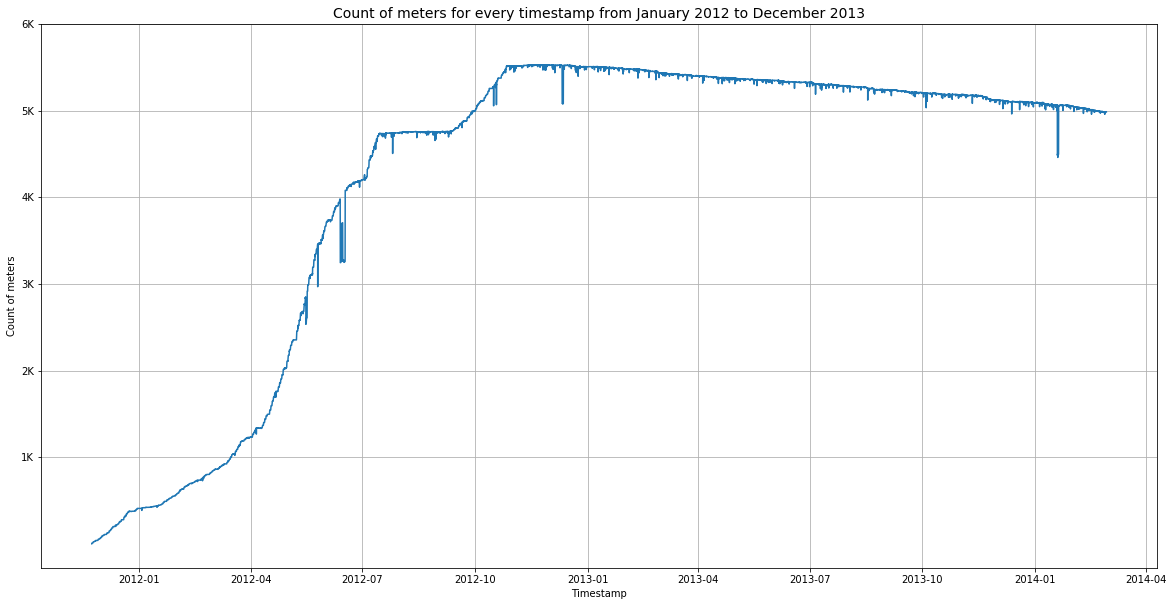

In [17]:
plt.figure(figsize=(20,10))
plt.plot(housecount.tstp,housecount.LCLid)
plt.yticks([1000,2000,3000,4000,5000,6000],['1K','2K','3K','4K','5K','6K'])
plt.ylabel('Count of meters')
plt.xlabel('Timestamp')
plt.title('Count of meters for every timestamp from January 2012 to December 2013', fontsize = 14)
plt.grid()
plt.savefig('/Users/mariabelenalberti/OneDrive - Universidad Torcuato Di Tella/Tesis/plots')
plt.show()